
# Data Wrangling (Очистка данных)

    

## Задачи

После выполнения этого задания вы сможете:

* Обрабатывать отсутствующие значения
* Корректировать формат данных
* Стандартизировать и нормализовать данные

**Определение и обработка отсутствующих значений**

1. Определение отсутствующих значений
2. Работа с отсутствующими значениями
3. Правильный формат данных
   
- Стандартизация данных
- Нормализация данных (центрирование/масштабирование)
- Биннинг
- Индикаторная переменная


<h2>Какова цель обработки данных?</h2>


Обработка данных - это процесс преобразования данных из исходного формата в формат, который может быть более удобным для анализа.


<h3>Какова норма расхода топлива (L/100k) для дизельного автомобиля?</h3>


<h3>Импорт данных</h3>
<p>
Вы можете найти "Автомобильный набор данных" по следующей ссылке: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
Но мы будем использовать уже предварительно обработанный файл с заголовками, сохраненный в процессе ознакомления с базой данных на локальный компьютер по ссылке <a href= "C:/Users/admin/Desktop/automobile.csv">C:/Users/admin/Desktop/automobile.csv</a>

</p>


<h4>импортируем необходимые библиотеки и модули pandas и matplotlib</h4> 


In [319]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [320]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

<h2>Прочтем файл, расположенный на локальном компьютере, так как он предварительно обработан</h2>


In [321]:
# форматируем ссылку для того чтобы она была синтаксически верной с помощью r (обратные слеши будут верно восприниматься средой разработки)
# присвоим путь переменной локал файл
local_file = r"c:\Users\admin\Desktop\automobile.csv"

In [322]:
# прочтем наш csv файл, расположенный по адресу local_file в переменную df
df = pd.read_csv(local_file)

In [323]:
# Проверим, все ли в порядке и присутствуют ли заголовки
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450



## Как работать с отсутствующими данными?

**Шаги для работы с отсутствующими данными:**

   - Определить отсутствующие данные
   - Работа с отсутствующими данными
   - Корректный формат данных

## Оценим недостающие данные, и места где они расположены

Наши данные уже скорректированы и знаки вопроса. которые присутствовали ранее имеют значения NaN

Далее мы используем следующие функции для определения недостающих значений. Существует два метода определения отсутствующих данных:

   <code>.isnull()</code>
   
   <code>.notnull()</code>

На выходе получается булево значение, указывающее, действительно ли значение, переданное в аргументе, является отсутствующим.

Cслудующий код создает новый DataFrame <code>missing_data</code>, который содержит булевы значения <code>True</code> для каждой ячейки в исходном DataFrame df, где значение равно **NaN** (пропущено).

Метод <code>isnull()</code> возвращает DataFrame той же формы, что и исходный DataFrame df, но вместо значений содержит булевы значения True для каждой ячейки, где значение равно NaN, и False для всех остальных ячеек.

Метод head(5) используется для вывода первых 5 строк нового DataFrame missing_data.

In [324]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## ИТАК
"True" означает, что значение является отсутствующим, а "False" означает, что значение не является отсутствующим. Это очередной раз подтверждает факт, что в наших данных есть пропущенные значения, в возможно важных для нас столбцах, таких как числовой столбец - нормализованные потери, который может влиять на цену, так как это расход на автомобиль в год


<h4>Посчитаем сколько значений пропущено в каждом столбце</h4>
<p>
Используя цикл for в Python, мы можем быстро определить количество отсутствующих значений в каждом столбце. Как упоминалось выше, "True" означает отсутствующее значение, а "False" означает, что значение присутствует в наборе данных.  В теле цикла for метод ".value_counts()" подсчитывает количество значений "True".
</p>


Данный код используется для вывода информации о количестве пропущенных значений в каждом столбце DataFrame missing_data, в который мы сохранили информацию о столбцах, где значения равны **NaN**.

Цикл for проходит по каждому столбцу в DataFrame <code>missing_data</code>.

<code>missing_data.columns.values.tolist()</code> 

- Метод <code>columns</code> возвращает объект типа Index, содержащий названия всех столбцов в DataFrame missing_data. 

- Метод <code>values</code> возвращает массив значений из объекта Index. 

- Метод <code>tolist()</code> используется для преобразования массива в список. 

**Таким образом, мы получаем список названий всех столбцов в DataFrame missing_data.**

На каждой итерации цикла выводится название столбца с помощью функции print(). 

Затем вызывается метод <code>value_counts()</code> для столбца, который возвращает объект Series, содержащий количество уникальных значений в столбце и их частоту. 

Таким образом, мы получаем информацию о количестве пропущенных значений в каждом столбце. 

После вывода информации о каждом столбце, используется функция <code>print()</code> для вывода пустой строки, чтобы разделить информацию о каждом столбце.
Использую условие вывода (if), которое ограничит его только теми столбцами, в которых присутсвует значение TRUE - то есть пропущенные значения

In [325]:
for column in missing_data.columns.values.tolist():
    if True in missing_data[column].value_counts():
        print(column)
        print(missing_data[column].value_counts())
        print("")    

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

bore
False    197
True       4
Name: bore, dtype: int64

stroke
False    197
True       4
Name: stroke, dtype: int64

horsepower
False    199
True       2
Name: horsepower, dtype: int64

peak-rpm
False    199
True       2
Name: peak-rpm, dtype: int64



Мы видим, что у нас 6 столбцов содержат значения NaN

# Например, в столбце нормализованные потери 164 ячейки содержат данные, а пропущенных значений 37

normalized-losses

False    164

True      37

Name: normalized-losses, dtype: int64

<h1 id="deal_missing_values">Работа с недостающими данными</h1>
У нас есть несколько вариантов для обработки таких данных

<ol>
<li>Удалить данные<br>
        a. Отбросить (удалить) все строки<br>
        b. Удалить весь столбец
    </li>
<li>Заменить данные<br>
        a. Заменить на среднее значение по столбцу<br>
        b. Заменить на самое часто встречающееся значение<br>
        c. Заменить на другие функции
    </li>
</ol>


Целые столбцы следует отбрасывать только в том случае, если большинство записей в столбце пусты. В нашем наборе данных ни один из столбцов не является настолько пустым, чтобы отбрасывать его полностью.
У нас есть некоторая свобода в выборе метода замены данных; однако некоторые методы могут показаться более разумными, чем другие. Мы применим различные методы для разных типов столбцов, в том числе логические:

<b>Заменим на среднее значение по столбцу или еще лучше, отфильтруем эти значения по категориям и найдем среднее по каждой категории:</b>
<ul>
    <li>"normalized-losses": 37 отсутствующих данных, замените их средним значением</li>
    <li>"stroke": 4 отсутствующих данных, замените их средним значением</li>
    <li>"bore": 4 отсутствующих данных, замените их средним значением</li>
    <li>"horsepower": 2 отсутствующих данных, замените их средним значением</li>
    <li>"peak-rpm": 2 отсутствующих данных, замените их средним значением</li>
</ul>

<b>Замена по частоте (популярности) категориальных данных:</b>
<ul>
    <li>"num-of-doors": 2 отсутствующих данных, замените их средним значением "four" - четыре. 
        <ul>
            <li>Причина: 84% седанов - четырехдверные. Так как четырехдверные встречаются чаще всего, то и вероятность их появления наиболее высока (это мы проверим кодом далее)</li>
        </ul>
    </li>
</ul>

<b>Удалить всю строку:</b>
<ul>
    <li>"price": было 4 пропущенных значения, не так много и это важный параметр, но мы удалили эти строки в шаге 1
        <ul>
            <li>Причина: цена - это то, что мы хотим предсказать. Любая запись данных без данных о цене не может быть использована для прогнозирования; поэтому любая строка без данных о цене не является полезной для нас</li>
        </ul>
    </li>
</ul>


Ознакомимся с этими конкретными строками для того чтобы понять какие категории автомобилей имеют пропущенные значения, для того чтобы подобрать верные значения для замены пропущенных

In [326]:
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

     symboling  normalized-losses           make fuel-type aspiration  \
0            3                NaN    alfa-romero       gas        std   
1            3                NaN    alfa-romero       gas        std   
2            1                NaN    alfa-romero       gas        std   
5            2                NaN           audi       gas        std   
7            1                NaN           audi       gas        std   
13           1                NaN            bmw       gas        std   
14           0                NaN            bmw       gas        std   
15           0                NaN            bmw       gas        std   
16           0                NaN            bmw       gas        std   
26           1              148.0          dodge       gas      turbo   
42           0                NaN          isuzu       gas        std   
43           2                NaN          isuzu       gas        std   
45           0                NaN         jaguar   

Посмотрим На строки, отфильтрованные по столбцу, содержащему значение NaN, для того чтобы понять , какой фактор поможет понять какие значения лучше подойдут для замены пропущенных значений в категориальных столбцах
Для фильтрации строк в DataFrame по значению в конкретном столбце можно использовать метод loc[] и условное выражение

In [327]:
df.loc[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795


### Займемся изучением пропущенных значений в столбце - количество дверей, это категориальный столбец и мы смотрим, что вероятно, количество дверей может зависеть от типа кузова (body-style) и это SEDAN

In [328]:
# Для извлечения наиболее встречающихся значений в столбце num_of_doors, где значение в столбце body_style равно sedan, 
# можно использовать метод value_counts() в сочетании с условным выражением.

df.loc[df['body-style'] == 'sedan', 'num-of-doors'].value_counts()

four    78
two     14
Name: num-of-doors, dtype: int64

In [329]:
# или так, с помощью метода .idxmax()
df['num-of-doors'].value_counts().idxmax()

'four'

### Итак, так как мы совершенно не разбираемся в автомобилях, обратимся к результатам вывода. Седаны, в большенстве своем четырехдверные (four) значит заменим пропущенные значения в этом столбце на "four"

In [330]:
# в столбце "количество дверей" заменим пропущенное значение на наиболее часто встречающееся
df["num-of-doors"].replace(np.nan, 'four', inplace=True)

In [331]:
# ознакомимся с текущим положением дел
df.info()
# Все получилось. столбец с количеством дверей теперь имеет все заполненные ячейки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Перейдем к нормализованным потерям, это самый "пустой столбец", посмотрим по каким категориям необходимо посмотреть средние нормализованные потери

In [332]:
df.loc[df['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
13,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565
14,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
42,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785


Предварительно, у нас есть хэчбэки, седаны и вагоны, топливо газ, по моделям нет какого то серьезного преобладания какого то автопроизводителя 

In [333]:
# подсчет количества повторяющихся производителей с пропущенными значениями
make_counts = df['make'].loc[df['normalized-losses'].isnull()].value_counts()

# вывод результата
print(make_counts)

bmw              4
peugot           4
volkswagen       4
alfa-romero      3
mercedes-benz    3
mitsubishi       3
porsche          3
audi             2
isuzu            2
jaguar           2
mazda            2
renault          2
mercury          1
plymouth         1
toyota           1
Name: make, dtype: int64


Так как нам необходимы какие то категории, опишем этот набор строк с пропущенными значениями в нормализованных потерях

In [334]:
df.loc[df['normalized-losses'].isnull()].describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,37.000000,0.0,37,37,37,37,37,37,37,37.000000,...,37.000000,37,37.00000,37.000000,37.000000,35.000000,35.000000,37.000000,37.000000,37.00000
unique,NaN,NaN,15,2,2,2,5,2,2,NaN,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,bmw,gas,std,four,sedan,rwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,32,29,19,14,25,34,NaN,...,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.054054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.602703,...,166.405405,NaN,3.47027,3.341622,10.329730,137.085714,5022.857143,20.351351,25.540541,20922.27027
std,1.373276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.708090,...,57.438595,NaN,0.24271,0.404396,4.736963,48.602452,481.013461,5.116510,5.703774,11108.06792
min,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.600000,...,97.000000,NaN,2.68000,2.190000,7.000000,64.000000,4150.000000,13.000000,16.000000,6785.00000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.900000,...,130.000000,NaN,3.31000,3.190000,8.000000,95.000000,4750.000000,17.000000,24.000000,12764.00000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.400000,...,152.000000,NaN,3.47000,3.390000,8.500000,145.000000,5000.000000,19.000000,25.000000,16500.00000
75%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.800000,...,194.000000,NaN,3.62000,3.520000,9.200000,179.000000,5400.000000,23.000000,27.000000,32528.00000


 Возьмем несколько столбцов для приблизительного понимания
 В столбце make, в строках где есть пропущенные значения нормализованных потерь есть 37 значений, что логично. это наши 37 пропущенных строк.
- В столбце fuel-type есть 2 уникальных значения: gas и fuel.
- Наиболее часто встречающееся значение в столбце  make - bmv, оно встречается 4 раза, хотя и еще 2 автопроизводителя встречаются там столько же раз.
- Наиболее часто встречающееся значение в столбце fuel-type - gas, оно встречается 32 раза.

Эта информация получена с помощью метода describe(), вызванного с параметром all, который возвращает статистическую информацию для всех столбцов в DataFrame, включая нечисловые столбцы. В данном случае, метод describe() вернул количество непропущенных значений (count), количество уникальных значений (unique), наиболее часто встречающееся значение (top) и частоту наиболее часто встречающегося значения (freq) для каждого столбца.

In [335]:
# если описать датасет, мы видим, что существует сильный разбросв этих значениях, поэтому опишем каждую популярную модель по отельности
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# Займемся обработкой значений для BMW

Сделаем и просмотрим срез данных по марке bmw
### фильтрация строк по значению столбца 'make' и присвоение результатов переменной

In [336]:
bmw_df = df.loc[df['make'] == 'bmw']
bmw_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925
11,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970
12,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105
13,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565
14,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880


У нас есть 8 автомобилей этого производителя, они седаны, тип топлива - газ, есть разброс по некотором параметрам, типа лошадиных сил и так далее, но так или иначе, логика в этом присутствует

In [337]:

# взять толбец нормализованные потери из данных по BMW, задать тип флоат и найти среднее значение по столбцу
bmw_avg_norm_losses = bmw_df['normalized-losses'].astype('float').mean()
# посмотрим на среднее значение по этой модели автомобилей
print("Average of normalized-losses for bmw:", bmw_avg_norm_losses)

Average of normalized-losses for bmw: 190.0


In [338]:
# сравним со средним значением по столбцу
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


Итак,

В этом коде мы фильтруем исходный DataFrame df с помощью метода loc[], чтобы выбрать только те строки, где значение столбца 'make' равно 'bmw'. Результат фильтрации сохраняем в новый DataFrame bmv_df.

Затем мы используем метод astype() для преобразования значений столбца 'normalized-losses' из целочисленного типа в числовой тип 'float', если это необходимо. После этого мы используем метод mean() для расчета среднего значения столбца 'normalized-losses' в DataFrame bmv_df.

Наконец, мы выводим результат с помощью функции print(). В данном случае мы выводим среднее значение столбца 'normalized-losses' для строк, где значение столбца 'make' равно 'bmw'.

<code>Что такого примечательного я заметила? что среднее значение по столбцу, без фильтрации по марке автомобиля **гораздо ниже** (122.000000), нежели средний результат по модели bmw (Average of normalized-losses for bmv: 190.0) </code>


In [339]:

# заменяем значения NaN датафрейма bmv_df (выбранного ранее) в столбце "normalized-losses"  на среднее значение по  марке BMW
# Метод fillna() в Pandas используется для замены пропущенных значений (NaN) в объекте DataFrame или Series на другие значения. 

df.loc[(df['make'] == 'bmw') & (df['normalized-losses'].isnull()), 'normalized-losses'] = bmw_avg_norm_losses

Эта строка кода фильтрует DataFrame df, чтобы выбрать строки, в которых столбец 'make' равен 'bmw', а столбец 'normalized-losses' равен нулю (NaN). 

После того как строки выбраны, код устанавливает значение столбца 'normalized-losses' в значение переменной bmw_avg_norm_losses. Предполагается, что эта переменная содержит среднее значение столбца 'normalized-losses' для всех строк, в которых столбец 'make' равен 'bmw'.

Другими словами, эта строка кода заменяет отсутствующие значения в столбце 'normalized-losses' для автомобилей BMW средним значением столбца 'normalized-losses' для всех автомобилей BMW в DataFrame. 

Стоит отметить, что имя столбца 'normalized-losses' содержит дефис, который не является допустимым символом в именах переменных Python. Если этот код используется в сценарии Python, имя столбца должно быть записано в змеином_ регистре, а не через дефис.

In [340]:
df.loc[df['make'] == 'bmw']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925
11,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970
12,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105
13,1,190.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565
14,0,190.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,190.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,190.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880


Повторим это для еще 2 марок автомобилей, которых в пропущенных значениях больше всего

In [341]:
# подсчет количества повторяющихся производителей с пропущенными значениями
make_counts = df['make'].loc[df['normalized-losses'].isnull()].value_counts()

# вывод результата
print(make_counts)

peugot           4
volkswagen       4
alfa-romero      3
mercedes-benz    3
mitsubishi       3
porsche          3
audi             2
isuzu            2
jaguar           2
mazda            2
renault          2
mercury          1
plymouth         1
toyota           1
Name: make, dtype: int64


Мы видим, что теперь в списке отсутствует марка БМВ, так как мы заполнили пропущенные значения, займемся другими

In [342]:
# создадим срез данных для марки peugot
peugot_df = df.loc[df['make'] == 'peugot']
peugot_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
104,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,11900
105,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200
106,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,12440
107,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860
108,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,15580
109,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900
110,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,16695
111,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,17075
112,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,16630
113,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,17950


у нас 11 строк данных по этим автомобилям, и сразу можно заметить что нормализованные потери равны 161, что так же превышает среднее значение по всему столбцу. заполним эти значения для марки peugot 

In [343]:
# взять толбец нормализованные потери из данных по peugot, задать тип флоат и найти среднее значение по столбцу
peugot_avg_norm_losses = peugot_df['normalized-losses'].astype('float').mean()
# посмотрим на среднее значение по этой модели автомобилей
print("Average of normalized-losses for peugot:", peugot_avg_norm_losses, "Average of column normalized-losses :", avg_norm_loss )

Average of normalized-losses for peugot: 161.0 Average of column normalized-losses : 122.0


In [344]:
# заменим значения столбца нормализованные потери на средние значения по данной марке авто, которые равны нулю
df.loc[(df['make'] == 'peugot') & (df['normalized-losses'].isnull()), 'normalized-losses'] = peugot_avg_norm_losses
# просмотрим cрез данных для проверки ( Срез это временное представление данных, поэтому создадим его заново)
peugot_df = df.loc[df['make'] == 'peugot']
peugot_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
104,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,11900
105,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200
106,0,161.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,12440
107,0,161.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860
108,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,15580
109,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900
110,0,161.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,16695
111,0,161.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,17075
112,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,16630
113,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,17950


# Следующая марка это volkswagen

In [345]:
volkswagen_df = df.loc[df['make'] == 'volkswagen']
volkswagen_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
178,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7775
179,2,122.0,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,7975
180,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7995
181,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8195
182,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8495
183,2,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68.0,4500.0,37,42,9495
184,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100.0,5500.0,26,32,9995
185,3,NaN,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,11595
186,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,9980
187,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,24,13295


Просмотррев срез данных, я вижу что существует разброс в номализованных потерях, но стиль кузова этой машины - хэчбэк, что вероятно могло повлиять на этот показатель, необходимо отфильтровать это значение при расчете среднего значения

In [346]:
# взять толбец нормализованные потери из данных по volkswagen, задать тип флоат и найти среднее значение по столбцу
volkswagen_avg_norm_losses = volkswagen_df.loc[volkswagen_df['body-style'] == 'sedan', 'normalized-losses'].astype('float').mean()
# посмотрим на среднее значение по этой модели автомобилей
print("Average of normalized-losses for volkswagen:", volkswagen_avg_norm_losses,"Average of column normalized-losses :", avg_norm_loss)

Average of normalized-losses for volkswagen: 102.0 Average of column normalized-losses : 122.0


In [347]:
# заменим значения столбца нормализованные потери на средние значения по данной марке авто (volkswagen), которые равны нулю
df.loc[(df['make'] == 'volkswagen') & (df['normalized-losses'].isnull()), 'normalized-losses'] = volkswagen_avg_norm_losses
# просмотрим cрез данных для проверки ( Срез это временное представление данных, поэтому создадим его заново)
volkswagen_df = df.loc[df['make'] == 'volkswagen']
volkswagen_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
178,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7775
179,2,122.0,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,7975
180,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7995
181,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8195
182,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8495
183,2,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68.0,4500.0,37,42,9495
184,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100.0,5500.0,26,32,9995
185,3,102.0,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,11595
186,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,9980
187,0,102.0,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,24,13295


In [348]:
# подсчет количества повторяющихся производителей с пропущенными значениями
make_counts = df['make'].loc[df['normalized-losses'].isnull()].value_counts()

# вывод результата
print(make_counts)

alfa-romero      3
mercedes-benz    3
mitsubishi       3
porsche          3
audi             2
isuzu            2
jaguar           2
mazda            2
renault          2
mercury          1
plymouth         1
toyota           1
Name: make, dtype: int64


Просмотрим все три марки одновременно
Чтобы просмотреть все строки с автомобилями марок 'alfa-romero', 'mercedes-benz' и 'mitsubishi и 'porsche', вам нужно использовать оператор "или" (|) вместо запятой (',') в вашем коде. 

Также, мы будем использовать метод isin() для проверки наличия значения в списке марок. Вот пример кода на Python:

In [349]:
slice4makes_df = df.loc[df['make'].isin(['alfa-romero', 'mercedes-benz', 'mitsubishi','porsche'])]
slice4makes_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552
65,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960


- Будет не разумно сравнивать нормализованные потери мерседеса с другими, так как они ниже. поэтому опять сделаем отдельный расчет
- второй момент - в марке mitsubishi у нас  есть два типа кузова - это hatchback и sedan. hatchback имеет более высокие показатели нормализованнх потерь, поэтому необходимо сделать фильтр по типу кузова при расчете среднего показателя
- остальные марки не дают возможности расчитать среднее значение , поэтому все остальные пропущенные значения - будут средними по столбцу

# mercedes-benz

In [350]:
mercedes_benz_df = df.loc[df['make'] == 'mercedes-benz']
mercedes_benz_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552
65,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


Этот код выберет только те строки в DataFrame mercedes_benz_df, где значение в столбце 'body-style' равно 'sedan' или 'hardtop', затем выберет столбец 'normalized-losses' для этих строк, и в конце вычислит среднее значение для этого столбца.

In [351]:

# взять толбец нормализованные потери из данных по мерседес, задать тип флоат и найти среднее значение по столбцу c учетом фильтра по типу кузова
mercedes_benz_avg_norm_losses = mercedes_benz_df.loc[mercedes_benz_df['body-style'].isin(['sedan', 'hardtop']), 'normalized-losses'].mean()
# посмотрим на среднее значение по этой модели автомобилей
print("Average of normalized-losses for mercedes_benz:", mercedes_benz_avg_norm_losses, "Average of column normalized-losses :", avg_norm_loss )

Average of normalized-losses for mercedes_benz: 93.0 Average of column normalized-losses : 122.0


In [352]:
# заменим значения столбца нормализованные потери на средние значения по данной марке авто (mercedes-benz), которые равны нулю
df.loc[(df['make'] == 'mercedes-benz') & (df['normalized-losses'].isnull()), 'normalized-losses'] = mercedes_benz_avg_norm_losses
# просмотрим cрез данных для проверки ( Срез это временное представление данных, поэтому создадим его заново)
mercedes_benz_df = df.loc[df['make'] == 'mercedes-benz']
mercedes_benz_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552
65,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,93.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,93.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,93.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


# mitsubishi

In [353]:
mitsubishi_df = df.loc[df['make'] == 'mitsubishi']
mitsubishi_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
73,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41,5389
74,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6189
75,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6669
76,1,161.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102.0,5500.0,24,30,7689
77,3,153.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9959
78,3,153.0,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8499
79,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145.0,5000.0,19,24,12629
80,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14869
81,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14489
82,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,6989


In [354]:
# взять толбец нормализованные потери из данных по mitsubishi, задать тип флоат и найти среднее значение по столбцу c учетом фильтра по типу кузова
mitsubishi_avg_norm_losses = mitsubishi_df.loc[mitsubishi_df['body-style'] == 'hatchback', 'normalized-losses'].mean().round(1)
# посмотрим на среднее значение по этой модели автомобилей
print("Average of normalized-losses for mitsubishi:", mitsubishi_avg_norm_losses, "Average of column normalized-losses :", avg_norm_loss )

Average of normalized-losses for mitsubishi: 158.3 Average of column normalized-losses : 122.0


In [355]:
# заменим значения столбца нормализованные потери на средние значения по данной марке авто (mitsubishi), которые равны нулю
df.loc[(df['make'] == 'mitsubishi') & (df['normalized-losses'].isnull()), 'normalized-losses'] = mitsubishi_avg_norm_losses
# просмотрим cрез данных для проверки ( Срез это временное представление данных, поэтому создадим его заново)
mitsubishi_df = df.loc[df['make'] == 'mitsubishi']
mitsubishi_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
73,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41,5389
74,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6189
75,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6669
76,1,161.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102.0,5500.0,24,30,7689
77,3,153.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9959
78,3,153.0,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8499
79,3,158.3,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145.0,5000.0,19,24,12629
80,3,158.3,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14869
81,3,158.3,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14489
82,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,6989


# Заменим оставшиеся строки на средние значения по столбцу, так как информации по ним у нас мало 

In [356]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [357]:
# проверим столбец. он должен быть полностью заполнен
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 201 entries, 0 to 200
Series name: normalized-losses
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


<h4>Продолжим работу над остальными столбцами . На очереди столбец "bore" </h4>


In [358]:
df['bore'].info()
# видим что у нас 4 пропущенных значения. 

<class 'pandas.core.series.Series'>
RangeIndex: 201 entries, 0 to 200
Series name: bore
Non-Null Count  Dtype  
--------------  -----  
197 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [359]:
# просмотрим строки, где столбец имеет нулевое значение
df[df['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645


Эти значения отсутствуют по автомобилю марки мазда. просмотрим эту марку

In [360]:
mazda_df = df[df['make'] == 'mazda']
mazda_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
47,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195
48,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095
49,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795
50,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695
51,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395
52,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645
56,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845


-  тип кузова hatchback

**ближайший сосед по значениям**

-  peak-rpm 5000.0
-  horsepower 68.0

In [361]:
# взять толбец bore из данных по mazda, задать тип флоат и найти среднее значение по столбцу c учетом фильтра по типу кузова
mazda_avg_bore = mazda_df.loc[(mazda_df['body-style'] == 'hatchback') & (mazda_df['peak-rpm'] == 5000.0) & (mazda_df['horsepower'] == 68.0), 'bore'].mean().round(1)
# посмотрим на среднее значение по этой модели автомобилей
print("Average bore for mazda:", mazda_avg_bore)

Average bore for mazda: 3.0


<h4>Замените "NaN" на среднее значение в колонке "bore" по автомобилю марки мазда с теми же параметрами что и предыдущий обработанный столбец.</h4>


In [362]:
# взять толбец bore из данных по mazda, задать тип флоат и найти среднее значение по столбцу c учетом фильтра по типу кузова и тп
mazda_avg_bore = mazda_df.loc[(mazda_df['body-style'] == 'hatchback') & (mazda_df['peak-rpm'] == 5000.0) & (mazda_df['horsepower'] == 68.0), 'bore'].mean().round(1)
# посмотрим на среднее значение по этой модели автомобилей
print("Average bore for mazda:", mazda_avg_bore)

Average bore for mazda: 3.0


In [363]:
# Заменим пропущенные данные на найденные значения
df["bore"].replace(np.nan, mazda_avg_bore, inplace=True)

# Заполним колонку Stroke
Там так же 4 пропущенных значения и все для автомобиля мазда

In [364]:
# взять толбец stroke из данных по mazda, задать тип флоат и найти среднее значение по столбцу c учетом фильтра по типу кузова и тп
mazda_avg_stroke = mazda_df.loc[(mazda_df['body-style'] == 'hatchback') & (mazda_df['peak-rpm'] == 5000.0) & (mazda_df['horsepower'] == 68.0), 'stroke'].mean().round(1)
# посмотрим на среднее значение по этой модели автомобилей
print("Average stroke for mazda:", mazda_avg_stroke)


Average stroke for mazda: 3.2


In [365]:
# Заменим пропущенные данные на найденные значения
df["stroke"].replace(np.nan, mazda_avg_stroke, inplace=True)

<h1> просмотрим строки где значение "horsepower" пропущено</h1>


In [366]:
# просмотрим строки, где столбец имеет нулевое значение
df[df['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


Вероятнее всего, нам необходимо просмотреть автомобили марки renault. сделаем это с помощью среза данных по этой марке

In [367]:
renault_df = df[df['make'] == 'renault']
renault_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


Похоже, у нас есть только два автомобиля рено и нам не с чем стравнить, кроме того, оставшиеся 2 пропущенных значения по параметру "пиковые обороты" так же приналежат этой марке
у нас есть 2 варианта и надеюсь мы продаем не автомобиль рено)) лучший который я вижу - удалить эти строки

удалим строки, где make равен 'renault', используя метод drop() в сочетании с методом index для выбора строк, которые нужно удалить. 

Этот код создаст новый DataFrame, в котором будут удалены все строки, где make равен 'renault'. Метод drop() не изменяет исходный DataFrame, поэтому присвоим результат новой(старой) переменной (в данном случае df)
то есть, фактически перезапишем данный датафрейм.

In [368]:
df = df.drop(df[df['make'] == 'renault'].index)

In [369]:
# проверим. сет данных должен быть пустой
renault_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    float64
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

# ***Теперь в нашем датасете 199 строк и нет прошущенных значений***

## Теперь посмотрим соответствуют ли типы данных банальной логике и подлежат ли они анализу и какому типу анализа

In [371]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<p>как мы видим выше, некоторые столбцы имеют неправильный тип данных. Числовые переменные должны иметь тип 'float' или 'int', а переменные со строками, такие как категории, должны иметь тип 'object'. 

Например, переменные 'bore' и 'stroke' - это числовые значения, описывающие двигатели, поэтому мы должны ожидать, что они будут иметь тип 'float' или 'int'; однако они показаны как тип 'object'. 

Мы должны преобразовать типы данных в соответствующий формат для каждого столбца с помощью метода "astype()".</p> 


<h4>Преобразуем столбцы с неверными типами данных в надлежащий формат</h4>

Этот код преобразует тип данных определенных столбцов в DataFrame в float или integer с помощью метода astype(). 


In [372]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h4>Проверим изменились ли типы данных</h4>


In [373]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Отлично!</b>

Теперь мы наконец -то получили очищенный набор данных без отсутствия значений со всеми данными в его правильном формате.


## Стандартизация данных

Данные обычно собираются в разных учреждениях в разных форматах.
("Стандартизация данных" - это также термин для обозначения определенного типа нормализации данных, когда мы вычитаем среднее значение и делим на стандартное отклонение).

    
**Что такое стандартизация?**

Стандартизация - это процесс преобразования данных в общий формат, позволяющий исследователю провести значимое сравнение.


### **Пример**
Преобразуйте mpg в L/100km:
В нашем наборе данных колонки расхода топлива "city-mpg" и "highway-mpg" представлены в единицах измерения mpg (мили на галлон). Предположим, что мы разрабатываем приложение в стране, которая принимает расход топлива в стандарте L/100km.
Нам нужно будет применить преобразование данных, чтобы преобразовать mpg в L/100km.</p>


<p>Формула для конвертации:<p>
L/100km = 235 / mpg
<p>Мы можем выполнять многие математические операции непосредственно в Pandas.</p>


In [374]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [375]:
# Перевести mpg в L/100km путем математической операции (235 разделить на mpg)
# я создаю новый столбец с названием city-L/100km и приравниваю каждой ячейке значение 235/на текущее значение этой ячейки в столбце
df['city-L/100km'] = 235/df["city-mpg"]

# проверим
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


### Согласно приведенному выше примеру, преобразуем mpg в L/100km в колонке "highway-mpg" и добавим колонку на "highway-L/100km".

In [376]:
df["highway-L/100km"] = 235/df["highway-mpg"]
# проверим
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


Если бы нам на сто процентов не были нужны старые данные, мы бы могли перезаписать значения этих колонок, и переименовав колонки
<code>

##### ***перевести mpg в L/100km математически (235 деленное на текущее значение mpg)***
df["highway-mpg"] = 235/df["highway-mpg"]

##### ***переименовать столбец "highway-mpg" в "highway-L/100km"***
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

##### ***проверить***
df.head()
</code>

In [377]:
# удалим колонки со старыми показателями
df = df.drop(columns=['city-mpg', 'highway-mpg'])

<h2 id="data_normalization">Нормализация данных</h2>

<p>Нормализация - это процесс преобразования значений нескольких переменных в одинаковый диапазон. 

Типичная нормализация включает масштабирование переменной так, чтобы среднее значение переменной было равно 0, 
масштабирование переменной так, чтобы дисперсия была равна 1, или масштабирование переменной так, чтобы значения переменной варьировались от 0 до 1.
Нормализация данных - это процесс приведения значений признаков в диапазон от 0 до 1 или от -1 до 1. Это может быть полезно для улучшения производительности алгоритмов машинного обучения, так как многие алгоритмы работают лучше, когда данные находятся в одном диапазоне.

Существует несколько методов нормализации данных, вот некоторые из них:

1. Min-Max нормализация: этот метод приводит значения признаков в диапазон от 0 до 1. Формула для Min-Max нормализации:

   
   x_norm = (x - x_min) / (x_max - x_min)
   

   Где x - исходное значение признака, x_min - минимальное значение признака, x_max - максимальное значение признака.

2. Z-нормализация: этот метод приводит значения признаков к стандартному нормальному распределению со средним значением 0 и стандартным отклонением 1. Формула для Z-нормализации:

   
   x_norm = (x - mean) / std
   

   Где x - исходное значение признака, mean - среднее значение признака, std - стандартное отклонение признака.

3. Логарифмическая нормализация: этот метод применяется к данным, которые имеют большой разброс значений. Он применяет логарифмическую функцию к данным, чтобы уменьшить разброс значений.

Какой метод нормализации использовать, зависит от данных и задачи. Min-Max нормализация хорошо работает для данных, которые имеют равномерное распределение, а Z-нормализация - для данных, которые имеют нормальное распределение. Логарифмическая нормализация может быть полезна для данных, которые имеют большой разброс значений.

Важно также помнить, что нормализация данных может быть не всегда необходима. Например, для деревьев решений и некоторых других алгоритмов машинного обучения нормализация не требуется.

</p>

<b>Пример</b>
<p>Чтобы продемонстрировать нормализацию, допустим, мы хотим масштабировать столбцы "длина", "ширина" и "высота".</p>
<p><b>Цель:</b> хотелось бы нормализовать эти переменные, чтобы их значение было в диапазоне от 0 до 1</p>
<p><b>Задача:</b> заменить исходное значение на (исходное значение)/(максимальное значение)</p>



In [378]:
# заменить исходное значение на (исходное значение)/(максимальное значение) по этому столбцу
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [379]:
# проверить результаты
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Здесь видно, что мы нормализовали "длину", "ширину" и "высоту" в диапазоне [0,1].


<h2 id="binning">Биннинг</h2>
Бинирование - это процесс преобразования непрерывных числовых переменных в дискретные категориальные "бины" для группированного анализа.

In [380]:
df[["horsepower"]].describe()

,horsepower
count,199.000000
mean,103.396985
std,37.553843
min,48.000000
25%,70.000000
50%,95.000000
75%,116.000000
max,262.000000


In [381]:
unique_horsepower = df["horsepower"].nunique()
print("Количество уникальных значений в столбце 'horsepower':", unique_horsepower)

Количество уникальных значений в столбце 'horsepower': 58




<b>Пример: </b>

<p>В нашем наборе данных "лошадиная сила" - это вещественная переменная, имеющая значение от 48 до 262, и она имеет 58 уникальных значений. Что если нас интересует только разница в цене между автомобилями с большой мощностью, 

средней мощностью и малой мощностью (3 типа)? Можем ли мы разложить их по трем "корзинам" для упрощения анализа? </p>

<p>Мы будем использовать метод pandas 'cut' для сегментации столбца 'лошадиные силы' на 3 диапазона.</p>


<h3>Пример биннинга в Pandas</h3>


 Преобразование данных в правильный формат:


In [382]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Этот код преобразует тип данных столбца "horsepower" в целочисленный тип данных (integer) с помощью метода astype(). 

Аргумент int указывает на то, что мы хотим преобразовать столбец в целочисленный тип данных. Аргумент <code>copy=True</code> указывает на то, что мы хотим создать копию столбца, а не изменять исходный столбец в DataFrame.

Это может быть полезно, если мы хотим выполнить математические операции с данными в столбце "horsepower", которые могут быть выполнены только с целочисленными значениями.

Давайте построим гистограмму лошадиных сил, чтобы увидеть, как выглядит распределение лошадиных сил.


Text(0.5, 1.0, 'horsepower bins')

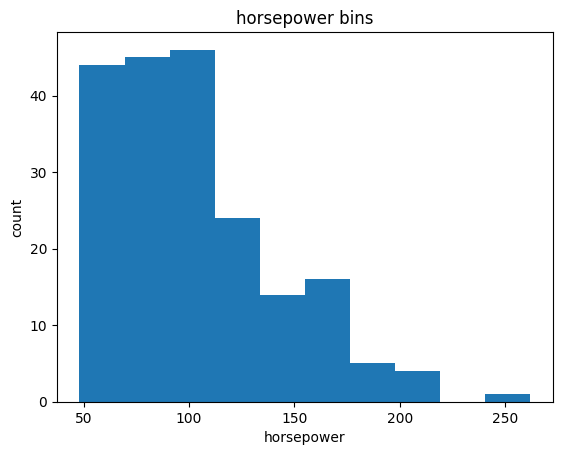

In [383]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# установить x/y лейблы и наименование гистограммы
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Мы хотим получить 3 бина одинакового размера, поэтому используем функцию numpy <code>linspace(start_value, end_value, numbers_generated)</code>.</p>
<p>Поскольку мы хотим включить минимальное значение лошадиной силы, мы хотим установить <code>start_value = min(df["horsepower"])</code>.</p>
<p>Поскольку мы хотим включить максимальное значение лошадиных сил, мы хотим установить <code>end_value = max(df["horsepower"])</code>.</p>
<p>Поскольку мы строим 3 бина одинаковой длины, делителей должно быть 4, поэтому <code>numbers_generated = 4</code>.</p>
Маленький - от мин до второго значения, средний - от второго до третьего, и большой от третьего  до макс


Построим массив бинов с минимальным значением и максимальным значением, используя рассчитанную выше ширину полосы. Эти значения будут определять, когда заканчивается один бин и начинается другой.


In [384]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Этот код создает равномерно распределенные интервалы (bins) для столбца "horsepower" в DataFrame df с помощью функции linspace() из библиотеки NumPy.

Аргументы функции <code>linspace()</code> - это минимальное и максимальное значения столбца "horsepower" в DataFrame df, а также количество интервалов, которые мы хотим создать. В данном случае мы создаем 4 интервала.

Результатом выполнения этого кода будет массив bins, содержащий значения границ интервалов для столбца "horsepower". Эти границы могут быть использованы для группировки значений столбца "horsepower" в соответствующие интервалы с помощью метода cut() в Pandas. 

Например, если мы хотим создать новый столбец "horsepower-binned", содержащий значения интервалов для каждого значения в столбце "horsepower", мы можем использовать следующий код:

<code>df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=["Low", "Medium", "High"])</code>


Этот код создаст новый столбец "horsepower-binned" в DataFrame df, содержащий значения "Low", "Medium" или "High" в зависимости от того, в какой интервал попадает каждое значение в столбце "horsepower".

Мы применяем функцию "cut", чтобы определить, к чему относится каждое значение `df['horsepower']`.

In [385]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=["Low", "Medium", "High"], include_lowest=True)

In [386]:
df[['horsepower','horsepower-binned']].head(15)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Или через наименование групп:


Посмотрим сколько всего автомобилей в каждой группе:


In [387]:
df["horsepower-binned"].value_counts()

Low       151
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Построим график распределения


Text(0.5, 1.0, 'horsepower bins')

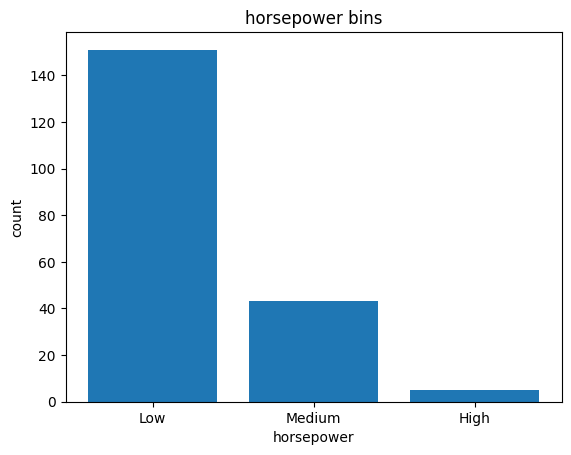

In [388]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names = ['Low', 'Medium', 'High']
pyplot.bar(group_names,df["horsepower-binned"].value_counts())

# # установить x/y лейблы и наименование гистограммы
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
   В столбцах гистограммы представлены бины для "лошадиных сил" на основе 3 категорий ("Низкая", "Средняя" и "Высокая") и количсетво данных присутствующих в каждой категории.
</p>
<p>
    Мы успешно сократили интервалы с 58 до 3!
</p>


<h3>Визуализация Бинов</h3>
Обычно гистограмма используется для визуализации распределения бинов, которое мы создали выше. 


Text(0.5, 1.0, 'horsepower bins')

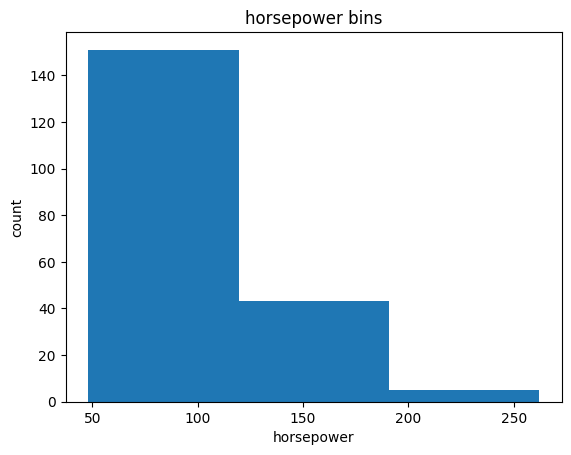

In [389]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# гистограмма атрибута "horsepower" с бинами  = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# лейблы и названия
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

На графике выше показан результат биннинга для атрибута "лошадиная сила".


**Индикаторная переменная (или фиктивная переменная)**


***Индикаторная переменная (или фиктивная переменная)*** - это числовая переменная, используемая для обозначения категорий. Их называют "фиктивными", поскольку сами числа не имеют собственного значения. 

Мы используем индикаторные переменные, чтобы иметь возможность использовать категориальные переменные для регрессионного анализа.

**Например:**

Мы видим, что колонка "тип топлива" имеет два уникальных значения: "gas" or "diesel". Регрессия не понимает слов, только числа. Чтобы использовать этот атрибут в регрессионном анализе, мы преобразуем "тип топлива" в индикаторные переменные.

Мы будем использовать метод pandas 'get_dummies' для присвоения числовых значений различным категориям типа топлива.



In [390]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'city-L/100km',
       'highway-L/100km', 'horsepower-binned'],
      dtype='object')

Получить индикаторные переменные и присвоить их кадру данных "dummy_variable_fuel":


In [391]:
# создает DataFrame dummy_variable_fuel, содержащий две фиктивные переменные для столбца "fuel-type"
dummy_variable_fuel = pd.get_dummies(df["fuel-type"])
dummy_variable_fuel.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [392]:
#переименовывает столбцы в DataFrame dummy_variable_fuel, чтобы они были более понятными
dummy_variable_fuel.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_fuel.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


- создаем фиктивные переменные (dummy variables) для столбца "fuel-type" в DataFrame df с помощью метода get_dummies() в Pandas.

- Метод get_dummies() преобразует категориальные переменные в фиктивные переменные, которые могут быть использованы в анализе данных. В данном случае, мы создаем две фиктивные переменные - "fuel-type-gas" и "fuel-type-diesel" - для столбца "fuel-type".

- Первая строка кода создает DataFrame dummy_variable_fuel, содержащий две фиктивные переменные для столбца "fuel-type". 

- Вторая строка кода переименовывает столбцы в DataFrame dummy_variable_fuel, чтобы они были более понятными.

Например, если в столбце "fuel-type" в DataFrame df есть значения "gas" и "diesel", то после выполнения этого кода DataFrame dummy_variable_fuel будет содержать два столбца - "fuel-type-gas" и "fuel-type-diesel" - со значениями 0 или 1 

в зависимости от того, какое значение было в столбце "fuel-type" для каждой строки в DataFrame df.

В наших данных столбец "тип топлива" имеет значения "газ" и "дизель" как 0  и 1.


Этот код объединяет два DataFrame, df и dummy_variable_fuel, по оси columns (axis=1). Результирующий DataFrame будет содержать все столбцы из df и все столбцы из dummy_variable_fuel, добавленные справа от df. 

Важно отметить, что два конкатенируемых DataFrame должны иметь одинаковое количество строк, иначе возникнет ошибка.

In [393]:
# объединим два DataFrame, df и dummy_variable_fuel, по оси columns (axis=1)
df = pd.concat([df, dummy_variable_fuel], axis=1)

# удалить оригинальный столбец "fuel-type" из"df"
df.drop("fuel-type", axis = 1, inplace=True)

In [394]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,0,1


Последние два столбца теперь являются представлением индикаторной переменной переменной типа топлива. Теперь это все 0 и 1



<b>Как и раньше, создадим индикаторную переменную для столбца "aspiration"</b>



In [395]:
# создает DataFrame dummy_variable_aspiration, содержащий две фиктивные переменные для столбца "aspiration"
dummy_variable_aspiration = pd.get_dummies(df["aspiration"])
dummy_variable_aspiration.head()


,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [396]:
#переименовывает столбцы в DataFrame dummy_variable_aspiration, чтобы они были более понятными
dummy_variable_aspiration.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_aspiration.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [397]:
# объединим два DataFrame, df и dummy_variable_aspiration, по оси columns (axis=1)
df = pd.concat([df, dummy_variable_aspiration], axis=1)

# удалить оригинальный столбец "aspiration" из"df"
df.drop("aspiration", axis = 1, inplace=True)

# Предварительная Очистка, нормализация данных окончена

## Выполнены следующие шаги:

- Недостающие значения были заменены на средние значения по своей модели и иным показателям, которые наиболее часто встречаются для пропущенных характеристик
- Данные стандартизированы под необходимые нам показатели (в место галлонов в литры)
- Данные Нормализованы в некоторых столбцах имеющих высокий разброс и разные диапазоны значений (например, один столбец от 150 до 250, второй столбец от 30 до 60 и третий столбец от 20 до 80) и приведены у значениям от 0 до 1, 
- исправлены не верные типы данных в базе (числовые типы данных, котрые хранились с типом обьекта конвертированы в типы int и float)
- произведен биннинг данных, то есть разбивка их на категории (слабая мощность. средняя мощность, высокая мощность)
- некоторые столбцы имеющие 2 типа даннх (например только 2 типа топлива) присвоены знаячения 0 или 1 в зависимости от типа для будущего регрессионного анализа
- удалены строки которые сложно поддаются восстановлению данных (наши две строки с рено)
- удалены старые столбцы, которые нам уже не нужны для анализа данных, мы их стандартизировали и создали новые

In [403]:
# проверим состояние данных перед сохранением датасета
df['highway-L/100km'].describe()

count    199.000000
mean       8.049623
std        1.849417
min        4.351852
25%        6.911765
50%        7.833333
75%        9.400000
max       14.687500
Name: highway-L/100km, dtype: float64

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          199 non-null    int64   
 1   normalized-losses  199 non-null    int32   
 2   make               199 non-null    object  
 3   num-of-doors       199 non-null    object  
 4   body-style         199 non-null    object  
 5   drive-wheels       199 non-null    object  
 6   engine-location    199 non-null    object  
 7   wheel-base         199 non-null    float64 
 8   length             199 non-null    float64 
 9   width              199 non-null    float64 
 10  height             199 non-null    float64 
 11  curb-weight        199 non-null    int64   
 12  engine-type        199 non-null    object  
 13  num-of-cylinders   199 non-null    object  
 14  engine-size        199 non-null    int64   
 15  fuel-system        199 non-null    object  
 16  bore    

In [401]:
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=True).head(5)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_8044/1564551947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


aspiration-std      -0.177821
fuel-type-gas       -0.108978
peak-rpm            -0.101649
symboling           -0.082465
compression-ratio    0.069549
Name: price, dtype: float64

Сохраним в новый csv (в текущую папку, но можно указать адрес сохранения, как в предыдущем шаге):


In [400]:
df.to_csv('clean_df.csv')